## Predicting Hospital Readmissions - Medicare Hospital Compare Data

### There are 6 relevant data sets
#### Target data is included in Readmissions_and_Death.csv. I am using the Readmissions data for all 8 diseases
#### Feature data comes from 6 different data sets. Hospital Names are common to all datasets

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
comp = pd.read_csv('Complications_-_Hospital.csv')
death = pd.read_csv('Readmissions_and_Deaths.csv')

In [20]:
readm_only = death[death['Measure ID'].str.contains('READM')] #excluding mortality
readm_only.info() #dataframe of readmissions only

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38456 entries, 6 to 67297
Data columns (total 19 columns):
Provider ID             38456 non-null int64
Hospital Name           38456 non-null object
Address                 38456 non-null object
City                    38456 non-null object
State                   38456 non-null object
ZIP Code                38456 non-null int64
County Name             38336 non-null object
Phone Number            38456 non-null int64
Measure Name            38456 non-null object
Measure ID              38456 non-null object
Compared to National    38456 non-null object
Denominator             38456 non-null object
Score                   38456 non-null object
Lower Estimate          38456 non-null object
Higher Estimate         38456 non-null object
Footnote                14162 non-null object
Measure Start Date      38456 non-null object
Measure End Date        38456 non-null object
Location                0 non-null float64
dtypes: float64(1), int

## Example of Readmit scores for one random hosp

In [21]:
abbot = readm_only[readm_only['Hospital Name'] == 'ABBOTT NORTHWESTERN HOSPITAL'] #just grabbing one example to graph

In [22]:
list_conditions = ['Heart Attack', 'Coronary Artery Bypass', 'COPD', 'Heart Failure', 'Hip/Knee Replacement',
                          'General', 'Pneumonia', 'Stroke']

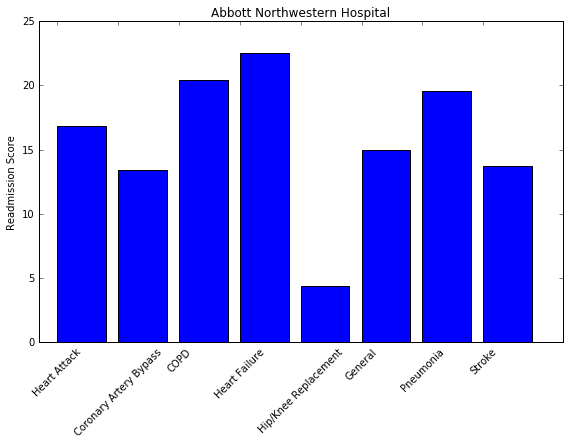

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
wid = .3
ind = ind = np.arange(len(abbot.Score))
plt.bar(ind, abbot.Score)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Readmission Score')
plt.title('Abbott Northwestern Hospital')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()

In [24]:
readm_only.Score.notnull().count()

38456

In [25]:
readm_only.Score[:1] #Why is this an object and not a float - because of NaNs?

6    16.5
Name: Score, dtype: object

In [26]:
readm_only.Score.unique() #'Not Available' is screwing this up 

array(['16.5', '15.1', '21.1', '21.4', '5.1', '15.4', '18.7', '12.7',
       '16.7', 'Not Available', '18.0', '21.9', '5.7', '14.9', '16.4',
       '13.4', '16.1', '15.2', '19.8', '20.6', '5.0', '17.9', '12.0',
       '19.9', '16.6', '17.3', '11.3', '19.2', '23.1', '15.7', '16.0',
       '17.7', '15.0', '19.6', '15.3', '23.4', '19.4', '12.8', '15.8',
       '21.5', '14.7', '17.1', '12.4', '23.0', '22.4', '4.1', '15.9',
       '18.3', '13.5', '21.3', '14.8', '18.1', '15.6', '19.5', '23.3',
       '4.7', '18.6', '13.8', '14.0', '17.2', '19.0', '4.9', '16.9',
       '13.0', '16.8', '12.6', '23.2', '5.9', '12.1', '21.6', '16.3',
       '23.7', '20.1', '21.7', '16.2', '22.8', '4.6', '12.5', '3.9',
       '20.3', '24.0', '13.7', '4.8', '12.3', '19.7', '21.0', '6.7',
       '13.1', '20.8', '22.2', '11.2', '14.2', '22.3', '17.5', '20.0',
       '22.5', '4.3', '20.4', '19.1', '14.6', '13.3', '17.8', '22.6',
       '14.1', '18.8', '20.7', '20.9', '20.2', '6.2', '22.9', '13.2',
       '5.5', '15.

In [27]:
readm_only[readm_only['Score'] == 0] #There are no 0s in this dataframe

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location


In [28]:
z = readm_only['Score'].replace({'Not Available':'0'}) 

In [30]:
readm_only['Score'] = z.astype(float)

/Users/sheena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
readm_only.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
dtype: object

In [33]:
r = pd.pivot_table(readm_only, index='Hospital Name', columns = 'Measure ID', values = 'Score')
#r.index = r.index.droplevel()

In [34]:
r.head()

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Hospital Name,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,0.0,0.0,20.3,21.1,4.4,15.7,17.3,0.0
ABBEVILLE GENERAL HOSPITAL,0.0,0.0,19.1,24.6,4.2,16.0,17.8,0.0
ABBOTT NORTHWESTERN HOSPITAL,16.8,13.4,20.4,22.5,4.4,15.0,19.6,13.7
ABILENE REGIONAL MEDICAL CENTER,16.4,15.0,18.3,22.4,4.0,14.5,15.5,13.5
ABINGTON MEMORIAL HOSPITAL,18.1,13.9,22.8,21.6,5.4,16.2,16.2,12.3


In [35]:
for x in r.columns:
    print x

READM_30_AMI
READM_30_CABG
READM_30_COPD
READM_30_HF
READM_30_HIP_KNEE
READM_30_HOSP_WIDE
READM_30_PN
READM_30_STK


In [36]:
lis = []
for x in r.columns:
    lis.append(r[x].mean(axis=0))

In [37]:
lis

[7.526218687996018,
 3.031933335400133,
 15.121803643766526,
 16.606390103133304,
 2.6075737588872347,
 14.239729869378294,
 14.520119977678572,
 6.775762881324414]

## Average Readmission Scores per disease

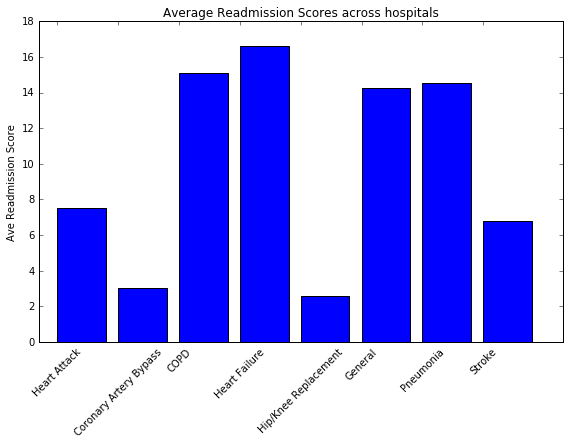

In [39]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

leng = np.arange(len(lis))
plt.bar(leng, lis)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(leng)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Ave Readmission Score')
plt.title('Average Readmission Scores across hospitals')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()
plt.show()

In [40]:
comp.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015,NaN


In [41]:
comp.info() #Same problem here with the scores being objects and not floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52877 entries, 0 to 52876
Data columns (total 19 columns):
Provider ID             52877 non-null int64
Hospital Name           52877 non-null object
Address                 52877 non-null object
City                    52877 non-null object
State                   52877 non-null object
ZIP Code                52877 non-null int64
County Name             52712 non-null object
Phone Number            52877 non-null int64
Measure Name            52877 non-null object
Measure ID              52877 non-null object
Compared to National    52877 non-null object
Denominator             52877 non-null object
Score                   52877 non-null object
Lower Estimate          52877 non-null object
Higher Estimate         52877 non-null object
Footnote                21804 non-null object
Measure Start Date      52877 non-null object
Measure End Date        52877 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [42]:
len(comp[comp.Score == 0]) # No 0 values here, so I'm safe to assign Not Availables to 0 

0

In [43]:
comp['Score'].replace('Not Available', 0, inplace=True)

In [44]:
comp['Score'] = comp['Score'].astype(float)
comp.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
dtype: object

In [45]:
na = len(comp[comp['Lower Estimate'] == 'Not Available'])
zero = len(comp[comp['Lower Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Lower Estimates." % (na, zero)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Lower Estimates.


In [46]:
na_h = len(comp[comp['Higher Estimate'] == 'Not Available'])
zero_h = len(comp[comp['Higher Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Higher Estimates." % (na_h, zero_h)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Higher Estimates.


In [47]:
comp['Lower Estimate'] = comp['Lower Estimate'].replace('Not Available', 0)

In [48]:
comp['Lower Estimate'] = comp['Lower Estimate'].astype(float)
comp['Lower Estimate'].dtype

dtype('float64')

In [49]:
comp['Higher Estimate'] = comp['Higher Estimate'].replace('Not Available', 0)
comp['Higher Estimate'] = comp['Higher Estimate'].astype(float)
comp['Higher Estimate'].dtype

dtype('float64')

In [50]:
comp_score = pd.pivot_table(comp, index='Hospital Name', columns = 'Measure ID', values = 'Score')
comp_score.head()

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,3.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,3.0,6.51,0.00,2.28,1.69,0.35,0.00,0.39,0.16,0.06,1.02
ABBOTT NORTHWESTERN HOSPITAL,2.5,5.23,11.26,1.78,1.96,0.10,124.52,0.32,0.11,0.06,0.97
ABILENE REGIONAL MEDICAL CENTER,3.1,3.43,6.36,2.21,1.17,0.16,138.47,0.40,0.12,0.06,0.67
ABINGTON MEMORIAL HOSPITAL,4.3,8.47,10.30,3.59,1.29,1.09,153.64,0.32,0.13,0.06,1.10


In [53]:
comp_low = pd.pivot_table(comp, index='Hospital Name', columns = 'Measure ID', values = 'Lower Estimate')
comp_low.head()

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,1.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,1.7,1.67,0.00,0.00,0.37,0.00,0.00,0.07,0.0,0.06,0.57
ABBOTT NORTHWESTERN HOSPITAL,1.7,3.47,6.15,0.00,1.42,0.00,92.72,0.09,0.0,0.06,0.78
ABILENE REGIONAL MEDICAL CENTER,2.0,0.17,0.00,0.00,0.27,0.00,92.17,0.12,0.0,0.06,0.36
ABINGTON MEMORIAL HOSPITAL,3.3,6.51,4.19,1.53,0.75,0.51,117.66,0.09,0.0,0.06,0.91


In [54]:
col_list_low = list(comp_low.columns.values)

In [55]:
low_cols = []
for i in col_list_low:
    low_cols.append(i + '_low')
print low_cols

['COMP_HIP_KNEE_low', 'PSI_12_POSTOP_PULMEMB_DVT_low', 'PSI_13_POST_SEPSIS_low', 'PSI_14_POSTOP_DEHIS_low', 'PSI_15_ACC_LAC_low', 'PSI_3_ULCER_low', 'PSI_4_SURG_COMP_low', 'PSI_6_IAT_PTX_low', 'PSI_7_CVCBI_low', 'PSI_8_POST_HIP_low', 'PSI_90_SAFETY_low']


In [56]:
comp_low.columns = low_cols

In [57]:
comp_low.head()

,COMP_HIP_KNEE_low,PSI_12_POSTOP_PULMEMB_DVT_low,PSI_13_POST_SEPSIS_low,PSI_14_POSTOP_DEHIS_low,PSI_15_ACC_LAC_low,PSI_3_ULCER_low,PSI_4_SURG_COMP_low,PSI_6_IAT_PTX_low,PSI_7_CVCBI_low,PSI_8_POST_HIP_low,PSI_90_SAFETY_low
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,1.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,1.7,1.67,0.00,0.00,0.37,0.00,0.00,0.07,0.0,0.06,0.57
ABBOTT NORTHWESTERN HOSPITAL,1.7,3.47,6.15,0.00,1.42,0.00,92.72,0.09,0.0,0.06,0.78
ABILENE REGIONAL MEDICAL CENTER,2.0,0.17,0.00,0.00,0.27,0.00,92.17,0.12,0.0,0.06,0.36
ABINGTON MEMORIAL HOSPITAL,3.3,6.51,4.19,1.53,0.75,0.51,117.66,0.09,0.0,0.06,0.91


In [58]:
comp_high = pd.pivot_table(comp, index='Hospital Name', columns = 'Measure ID', values = 'Higher Estimate')

In [59]:
col_list_high = list(comp_high.columns.values)

In [60]:
high_cols = []
for i in col_list_high:
    high_cols.append(i + '_high')
print high_cols

['COMP_HIP_KNEE_high', 'PSI_12_POSTOP_PULMEMB_DVT_high', 'PSI_13_POST_SEPSIS_high', 'PSI_14_POSTOP_DEHIS_high', 'PSI_15_ACC_LAC_high', 'PSI_3_ULCER_high', 'PSI_4_SURG_COMP_high', 'PSI_6_IAT_PTX_high', 'PSI_7_CVCBI_high', 'PSI_8_POST_HIP_high', 'PSI_90_SAFETY_high']


In [61]:
comp_high.columns = high_cols

In [62]:
comp_high.head()

,COMP_HIP_KNEE_high,PSI_12_POSTOP_PULMEMB_DVT_high,PSI_13_POST_SEPSIS_high,PSI_14_POSTOP_DEHIS_high,PSI_15_ACC_LAC_high,PSI_3_ULCER_high,PSI_4_SURG_COMP_high,PSI_6_IAT_PTX_high,PSI_7_CVCBI_high,PSI_8_POST_HIP_high,PSI_90_SAFETY_high
Hospital Name,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,5.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,5.0,11.34,0.00,4.60,3.02,1.65,0.00,0.71,0.47,0.06,1.47
ABBOTT NORTHWESTERN HOSPITAL,3.7,6.99,16.38,3.83,2.49,0.80,156.32,0.54,0.32,0.06,1.16
ABILENE REGIONAL MEDICAL CENTER,4.7,6.68,12.96,4.49,2.08,1.04,184.78,0.68,0.40,0.06,0.98
ABINGTON MEMORIAL HOSPITAL,5.7,10.43,16.42,5.65,1.83,1.67,189.61,0.54,0.35,0.06,1.30


In [179]:
reduc = pd.read_csv('Hospital-Acquired_Condition_Reduction_Program.csv')
reduc.head()

,Hospital_Name,Provider ID,State,Fiscal Year,Domain_1_Score,Domain_1_Score_Footnote,Domain_1_Start_Date,Domain_1_End_Date,AHRQ_PSI_90_Score,AHRQ_PSI_90_Score_Footnote,...,MRSA_Score,MRSA_Footnote,CDI_Score,CDI_Footnote,Domain_2_Start_Date,Domain_2_End_Date,Total_HAC_Score,Total_HAC_Score_Footnote,Payment_Reduction,Payment_Reduction_Footnote
0,ADVENTIST MEDICAL CENTER,50121,CA,2017,3.0,NaN,01-JUL-13,30-JUN-15,3.0,NaN,...,4.0,NaN,5.0,NaN,01-JAN-14,31-DEC-15,7.08,NaN,Yes,NaN
1,DAMERON HOSPITAL,50122,CA,2017,10.0,NaN,01-JUL-13,30-JUN-15,10.0,NaN,...,10.0,NaN,9.0,NaN,01-JAN-14,31-DEC-15,8.13,NaN,Yes,NaN
2,USC VERDUGO HILLS HOSPITAL,50124,CA,2017,4.0,NaN,01-JUL-13,30-JUN-15,4.0,NaN,...,4.0,NaN,5.0,NaN,01-JAN-14,31-DEC-15,5.70,NaN,No,NaN
3,REGIONAL MEDICAL CENTER OF SAN JOSE,50125,CA,2017,9.0,NaN,01-JUL-13,30-JUN-15,9.0,NaN,...,9.0,NaN,8.0,NaN,01-JAN-14,31-DEC-15,8.83,NaN,Yes,NaN
4,VALLEY PRESBYTERIAN HOSPITAL,50126,CA,2017,8.0,NaN,01-JUL-13,30-JUN-15,8.0,NaN,...,8.0,NaN,8.0,NaN,01-JAN-14,31-DEC-15,7.32,NaN,Yes,NaN


In [180]:
reduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 28 columns):
Hospital_Name                 3313 non-null object
Provider ID                   3313 non-null int64
State                         3313 non-null object
Fiscal Year                   3313 non-null int64
Domain_1_Score                3179 non-null float64
Domain_1_Score_Footnote       134 non-null float64
Domain_1_Start_Date           3313 non-null object
Domain_1_End_Date             3313 non-null object
AHRQ_PSI_90_Score             3216 non-null float64
AHRQ_PSI_90_Score_Footnote    134 non-null float64
Domain_2_Score                3173 non-null float64
Domain_2_Score_Footnote       170 non-null float64
CLABSI_Score                  2296 non-null float64
CLABSI_Score_Footnote         1034 non-null float64
CAUTI_Score                   2581 non-null float64
CAUTI_Score_Footnote          749 non-null float64
SSI_Score                     2573 non-null float64
SSI_Score_Footnote   

In [181]:
#only grabbing relevant features
feat_list = ['Hospital_Name', 'AHRQ_PSI_90_Score','CLABSI_Score','CAUTI_Score','SSI_Score','MRSA_Score','CDI_Score']
reduc = reduc[feat_list]
reduc.head()

,Hospital_Name,AHRQ_PSI_90_Score,CLABSI_Score,CAUTI_Score,SSI_Score,MRSA_Score,CDI_Score
0,ADVENTIST MEDICAL CENTER,3.0,10.0,10.0,10.0,4.0,5.0
1,DAMERON HOSPITAL,10.0,8.0,9.0,3.0,10.0,9.0
2,USC VERDUGO HILLS HOSPITAL,4.0,10.0,9.0,2.0,4.0,5.0
3,REGIONAL MEDICAL CENTER OF SAN JOSE,9.0,9.0,9.0,9.0,9.0,8.0
4,VALLEY PRESBYTERIAN HOSPITAL,8.0,8.0,4.0,8.0,8.0,8.0


In [182]:
for f in feat_list[1:]:
    null = reduc[f].isnull().sum()
    temp_zero = len(reduc[reduc[f] == 0]) 
    print "There are %s null values and 0 appears %s times for %s." % (null, temp_zero, f)
    #Nans exists here too but there are no 0s

There are 97 null values and 0 appears 0 times for AHRQ_PSI_90_Score.
There are 1017 null values and 0 appears 0 times for CLABSI_Score.
There are 732 null values and 0 appears 0 times for CAUTI_Score.
There are 740 null values and 0 appears 0 times for SSI_Score.
There are 940 null values and 0 appears 0 times for MRSA_Score.
There are 152 null values and 0 appears 0 times for CDI_Score.


In [183]:
for f in feat_list[1:]:
    reduc[f].fillna(value=0,inplace=True)

In [184]:
reduc.info() #Replaced the null values. Don't need to pivot this table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 7 columns):
Hospital_Name        3313 non-null object
AHRQ_PSI_90_Score    3313 non-null float64
CLABSI_Score         3313 non-null float64
CAUTI_Score          3313 non-null float64
SSI_Score            3313 non-null float64
MRSA_Score           3313 non-null float64
CDI_Score            3313 non-null float64
dtypes: float64(6), object(1)
memory usage: 181.2+ KB


In [72]:
spending = pd.read_csv('Medicare_Hospital_Spending_by_Claim.csv')
spending.head()

,Hospital_Name,Provider_ID,State,Period,Claim_Type,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Percent_of_Spending_Hospital,Percent_of_Spending_State,Percent_of_Spending_Nation
0,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Skilled Nursing Facility,$0.00,$0.00,$0.00,0%,0%,0%
1,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Durable Medical Equipment,$18.00,$31.00,$24.00,0.1%,0.16%,0.12%
2,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Carrier,$1062.00,$1480.00,$1540.00,6.01%,7.71%,7.52%
3,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Home Health Agency,$917.00,$948.00,$816.00,5.19%,4.94%,3.98%
4,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Hospice,$172.00,$154.00,$122.00,0.97%,0.8%,0.6%


In [73]:
spending = spending[(spending['Claim_Type'] == 'Inpatient') | (spending['Claim_Type'] == 'Outpatient') ]

In [74]:
spending = spending[(spending['Period'] == '1 through 30 days After Discharge from Index Hospital Admission') | 
                    (spending['Period'] == '1 to 3 days Prior to Index Hospital Admission') |
                    (spending['Period'] == 'During Index Hospital Admission')]

In [75]:
spending['Avg_Spending_Per_Episode_Hospital'] = (spending.Avg_Spending_Per_Episode_Hospital.str.replace('$', ' ')).astype(float) 
#Removing $, convert to float

In [76]:
spending.Avg_Spending_Per_Episode_Hospital.isnull().sum() #No missing values here

0

In [77]:
spending_in = spending[spending['Claim_Type'] == 'Inpatient']
spending_out = spending[spending['Claim_Type'] == 'Outpatient']

In [78]:
spending_in_pivot = pd.pivot_table(spending_in, index='Hospital_Name', columns='Period', values='Avg_Spending_Per_Episode_Hospital')

In [79]:
spending_in_pivot

Period,1 through 30 days After Discharge from Index Hospital Admission,1 to 3 days Prior to Index Hospital Admission,During Index Hospital Admission
Hospital_Name,,,
ABBEVILLE GENERAL HOSPITAL,2499.0,0.0,7515.0
ABBOTT NORTHWESTERN HOSPITAL,2355.0,5.0,11721.0
ABILENE REGIONAL MEDICAL CENTER,3873.0,14.0,9918.0
ABINGTON HEALTH LANSDALE HOSPITAL,1600.0,0.0,7500.0
ABINGTON MEMORIAL HOSPITAL,2011.0,3.0,8731.0
ABRAZO CENTRAL CAMPUS,3577.0,8.0,11295.0
ABRAZO MARYVALE CAMPUS,2236.0,30.0,7444.0
ABRAZO SCOTTSDALE CAMPUS,2991.0,0.0,7475.0
ABRAZO WEST CAMPUS,2194.0,4.0,8450.0


In [80]:
spending_in_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3059 entries, ABBEVILLE GENERAL HOSPITAL to ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER
Data columns (total 3 columns):
1 through 30 days After Discharge from Index Hospital Admission    3059 non-null float64
1 to 3 days Prior to Index Hospital Admission                      3059 non-null float64
During Index Hospital Admission                                    3059 non-null float64
dtypes: float64(3)
memory usage: 95.6+ KB


In [81]:
spending_out_pivot = pd.pivot_table(spending_out, index='Hospital_Name', columns='Period', values='Avg_Spending_Per_Episode_Hospital')

In [120]:
pay = pd.read_csv('Payment_and_value_of_care_-_Hospital.csv')
pay.head()

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,PAYM_30_AMI,...,"$20,404","$26,226",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart failure patients,PAYM_30_HF,...,"$15,237","$17,547",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for pneumonia patients,PAYM_30_PN,...,"$13,642","$15,118",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Payment for heart attack patients,PAYM_30_AMI,...,"$20,910","$25,353",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"200 MED CENTER DRIVE\nFORT PAYNE, AL 35968\n"
4,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Payment for heart failure patients,PAYM_30_HF,...,"$15,113","$18,491",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"200 MED CENTER DRIVE\nFORT PAYNE, AL 35968\n"


In [121]:
pay_feat_list = ['Hospital name', 'ZIP Code', 'Payment measure ID', 'Payment', 'Lower estimate', 'Higher estimate']
pay = pay[pay_feat_list]
pay.head ()

,Hospital name,ZIP Code,Payment measure ID,Payment,Lower estimate,Higher estimate
0,MARSHALL MEDICAL CENTER SOUTH,35957,PAYM_30_AMI,"$23,171","$20,404","$26,226"
1,MARSHALL MEDICAL CENTER SOUTH,35957,PAYM_30_HF,"$16,376","$15,237","$17,547"
2,MARSHALL MEDICAL CENTER SOUTH,35957,PAYM_30_PN,"$14,384","$13,642","$15,118"
3,DEKALB REGIONAL MEDICAL CENTER,35968,PAYM_30_AMI,"$22,997","$20,910","$25,353"
4,DEKALB REGIONAL MEDICAL CENTER,35968,PAYM_30_HF,"$16,722","$15,113","$18,491"


In [122]:
for f in pay_feat_list[3:6]:
    null = pay[f].isnull().sum()
    temp_zero = len(pay[pay[f] == 0]) 
    temp_na = len(pay[pay[f] == 'Not Available']) 
    print "There are %s null values, %s 'Not Availables' and 0 appears %s times for %s." % (null, temp_na, temp_zero, f)
    #Nans exists here too but there are no 0s

There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Payment.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Lower estimate.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Higher estimate.


In [123]:
#Since there are no 0s, I will fill in Not Availables with 0
for f in pay_feat_list[3:6]:
    null = pay[f].isnull().sum()
    temp_zero = len(pay[pay[f] == 0]) 
    temp_na = len(pay[pay[f] == 'Not Available']) 
    print "There are %s null values, %s 'Not Availables' and 0 appears %s times for %s." % (null, temp_na, temp_zero, f)

There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Payment.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Lower estimate.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Higher estimate.


In [126]:
for col in pay.columns[3:6]:
    pay[col] = pay[col].replace({'Not Available':'0'})

In [129]:
for col in pay.columns[3:6]:
    pay[col] = (pay[col].str.replace('$', ''))
    pay[col] = (pay[col].str.replace(',', ''))
    pay[col] = pay[col].astype(float)

In [131]:
pay.head()

,Hospital name,ZIP Code,Payment measure ID,Payment,Lower estimate,Higher estimate
0,MARSHALL MEDICAL CENTER SOUTH,35957,PAYM_30_AMI,23171.0,20404.0,26226.0
1,MARSHALL MEDICAL CENTER SOUTH,35957,PAYM_30_HF,16376.0,15237.0,17547.0
2,MARSHALL MEDICAL CENTER SOUTH,35957,PAYM_30_PN,14384.0,13642.0,15118.0
3,DEKALB REGIONAL MEDICAL CENTER,35968,PAYM_30_AMI,22997.0,20910.0,25353.0
4,DEKALB REGIONAL MEDICAL CENTER,35968,PAYM_30_HF,16722.0,15113.0,18491.0


In [146]:
#Create 2 pivot tables
pay_pay = pd.pivot_table(pay, index='Hospital name', columns = 'Payment measure ID', values='Payment')
pay_pay.head()

Payment measure ID,PAYM_30_AMI,PAYM_30_HF,PAYM_30_PN
Hospital name,,,
ABBEVILLE AREA MEDICAL CENTER,0.0,14185.0,11981.0
ABBEVILLE GENERAL HOSPITAL,0.0,17578.0,14218.0
ABBOTT NORTHWESTERN HOSPITAL,21099.0,17110.0,14609.0
ABILENE REGIONAL MEDICAL CENTER,21553.0,17531.0,15194.0
ABINGTON MEMORIAL HOSPITAL,23950.0,17047.0,14605.0


In [135]:
#Creating low estimate table
pay_low = pd.pivot_table(pay, index='Hospital name', columns = 'Payment measure ID', values = 'Lower estimate')
pay_low.head()

Payment measure ID,PAYM_30_AMI,PAYM_30_HF,PAYM_30_PN
Hospital name,,,
ABBEVILLE AREA MEDICAL CENTER,0.0,12159.0,10546.0
ABBEVILLE GENERAL HOSPITAL,0.0,15713.0,12664.0
ABBOTT NORTHWESTERN HOSPITAL,19867.0,16130.0,13399.0
ABILENE REGIONAL MEDICAL CENTER,19736.0,16058.0,13938.0
ABINGTON MEMORIAL HOSPITAL,22336.0,16325.0,13905.0


In [136]:
pay_low_cols = list(pay_low.columns.values)

In [137]:
pay_low_col_lis = []
for i in pay_low_cols:
    pay_low_col_lis.append(i + '_low')
print pay_low_col_lis

['PAYM_30_AMI_low', 'PAYM_30_HF_low', 'PAYM_30_PN_low']


In [138]:
pay_low.columns = pay_low_col_lis

import re
def regex(row):
    return re.sub(r"[^0-9]", "", row)

pay['Payment'] = pay.apply(regex, axis=1)

pay['New'] = pay.apply(regex('Payment'), axis=1)

In [147]:
pay_pay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4608 entries, ABBEVILLE AREA MEDICAL CENTER to ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER
Data columns (total 3 columns):
PAYM_30_AMI    4608 non-null float64
PAYM_30_HF     4608 non-null float64
PAYM_30_PN     4608 non-null float64
dtypes: float64(3)
memory usage: 144.0+ KB


In [143]:
#Creating a high estimates table
pay_high = pd.pivot_table(pay, index='Hospital name', columns = 'Payment measure ID', values = 'Higher estimate')
pay_high_cols = list(pay_high.columns.values)
pay_high_col_lis = []
for i in pay_high_cols:
    pay_high_col_lis.append(i + '_high')
print pay_high_col_lis

['PAYM_30_AMI_high', 'PAYM_30_HF_high', 'PAYM_30_PN_high']


In [144]:
pay_high.columns = pay_high_col_lis

In [145]:
pay_high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4608 entries, ABBEVILLE AREA MEDICAL CENTER to ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER
Data columns (total 3 columns):
PAYM_30_AMI_high    4608 non-null float64
PAYM_30_HF_high     4608 non-null float64
PAYM_30_PN_high     4608 non-null float64
dtypes: float64(3)
memory usage: 144.0+ KB


In [185]:
#making copies of all dataframes to maniupulate
comp_score_copy = comp_score.copy()
comp_score_low_copy = comp_low.copy()
comp_score_high_copy = comp_high.copy()
spending_in_pivot_copy = spending_in_pivot.copy()
spending_out_pivot_copy = spending_out_pivot.copy()
reduc_copy = reduc.copy()
pay_pay_copy = pay_pay.copy()
pay_low_copy = pay_low.copy()
pay_high_copy = pay_high.copy()

In [186]:
funcs = [comp_score_copy, comp_score_high_copy, comp_score_low_copy, spending_in_pivot_copy, 
         spending_out_pivot_copy, pay_pay_copy, pay_low_copy, pay_high_copy]
for func in funcs:
    func.reset_index(inplace=True)
    #reseting index so that I can have hospital name as column to join on

In [187]:
pay_high_copy.info() #Need to rename Hospital_Name so that they match in all dfs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4608 entries, 0 to 4607
Data columns (total 4 columns):
Hospital name       4608 non-null object
PAYM_30_AMI_high    4608 non-null float64
PAYM_30_HF_high     4608 non-null float64
PAYM_30_PN_high     4608 non-null float64
dtypes: float64(3), object(1)
memory usage: 144.1+ KB


In [188]:
spending_in_pivot_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)
spending_out_pivot_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)

In [189]:
reduc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 7 columns):
Hospital_Name        3313 non-null object
AHRQ_PSI_90_Score    3313 non-null float64
CLABSI_Score         3313 non-null float64
CAUTI_Score          3313 non-null float64
SSI_Score            3313 non-null float64
MRSA_Score           3313 non-null float64
CDI_Score            3313 non-null float64
dtypes: float64(6), object(1)
memory usage: 181.2+ KB


In [190]:
reduc_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)

In [191]:
pay_pay_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4608 entries, 0 to 4607
Data columns (total 4 columns):
Hospital name    4608 non-null object
PAYM_30_AMI      4608 non-null float64
PAYM_30_HF       4608 non-null float64
PAYM_30_PN       4608 non-null float64
dtypes: float64(3), object(1)
memory usage: 144.1+ KB


In [192]:
pay_pay_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)
pay_low_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)
pay_high_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)

In [213]:
#Just merging one by one and checking
d = pd.merge(comp_score_copy, comp_score_low_copy, on='Hospital Name', how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4608 entries, 0 to 4607
Data columns (total 23 columns):
Hospital Name                    4608 non-null object
COMP_HIP_KNEE                    4608 non-null float64
PSI_12_POSTOP_PULMEMB_DVT        4608 non-null float64
PSI_13_POST_SEPSIS               4608 non-null float64
PSI_14_POSTOP_DEHIS              4608 non-null float64
PSI_15_ACC_LAC                   4608 non-null float64
PSI_3_ULCER                      4608 non-null float64
PSI_4_SURG_COMP                  4608 non-null float64
PSI_6_IAT_PTX                    4608 non-null float64
PSI_7_CVCBI                      4608 non-null float64
PSI_8_POST_HIP                   4608 non-null float64
PSI_90_SAFETY                    4608 non-null float64
COMP_HIP_KNEE_low                4608 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low    4608 non-null float64
PSI_13_POST_SEPSIS_low           4608 non-null float64
PSI_14_POSTOP_DEHIS_low          4608 non-null float64
PSI_15_ACC_LAC

In [214]:
d = pd.merge(d, comp_score_high_copy, on='Hospital Name', how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4608 entries, 0 to 4607
Data columns (total 34 columns):
Hospital Name                     4608 non-null object
COMP_HIP_KNEE                     4608 non-null float64
PSI_12_POSTOP_PULMEMB_DVT         4608 non-null float64
PSI_13_POST_SEPSIS                4608 non-null float64
PSI_14_POSTOP_DEHIS               4608 non-null float64
PSI_15_ACC_LAC                    4608 non-null float64
PSI_3_ULCER                       4608 non-null float64
PSI_4_SURG_COMP                   4608 non-null float64
PSI_6_IAT_PTX                     4608 non-null float64
PSI_7_CVCBI                       4608 non-null float64
PSI_8_POST_HIP                    4608 non-null float64
PSI_90_SAFETY                     4608 non-null float64
COMP_HIP_KNEE_low                 4608 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low     4608 non-null float64
PSI_13_POST_SEPSIS_low            4608 non-null float64
PSI_14_POSTOP_DEHIS_low           4608 non-null float6

In [ ]:
## just names of all the feature tables
#comp_score_copy, comp_score_high_copy, comp_score_low_copy, spending_in_pivot_copy, 
         #spending_out_pivot_copy, pay_pay_copy, pay_low_copy, pay_high_copy, reduc_copy

In [215]:
d = pd.merge(d, spending_in_pivot_copy, on='Hospital Name', how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576 entries, 0 to 2575
Data columns (total 37 columns):
Hospital Name                                                      2576 non-null object
COMP_HIP_KNEE                                                      2576 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                          2576 non-null float64
PSI_13_POST_SEPSIS                                                 2576 non-null float64
PSI_14_POSTOP_DEHIS                                                2576 non-null float64
PSI_15_ACC_LAC                                                     2576 non-null float64
PSI_3_ULCER                                                        2576 non-null float64
PSI_4_SURG_COMP                                                    2576 non-null float64
PSI_6_IAT_PTX                                                      2576 non-null float64
PSI_7_CVCBI                                                        2576 non-null float64
PSI_

In [216]:
d = pd.merge(d, spending_out_pivot_copy, on='Hospital Name', how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576 entries, 0 to 2575
Data columns (total 40 columns):
Hospital Name                                                        2576 non-null object
COMP_HIP_KNEE                                                        2576 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                            2576 non-null float64
PSI_13_POST_SEPSIS                                                   2576 non-null float64
PSI_14_POSTOP_DEHIS                                                  2576 non-null float64
PSI_15_ACC_LAC                                                       2576 non-null float64
PSI_3_ULCER                                                          2576 non-null float64
PSI_4_SURG_COMP                                                      2576 non-null float64
PSI_6_IAT_PTX                                                        2576 non-null float64
PSI_7_CVCBI                                                          2576 n

In [217]:
d = pd.merge(d, reduc_copy, on='Hospital Name', how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 2686
Data columns (total 46 columns):
Hospital Name                                                        2687 non-null object
COMP_HIP_KNEE                                                        2687 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                            2687 non-null float64
PSI_13_POST_SEPSIS                                                   2687 non-null float64
PSI_14_POSTOP_DEHIS                                                  2687 non-null float64
PSI_15_ACC_LAC                                                       2687 non-null float64
PSI_3_ULCER                                                          2687 non-null float64
PSI_4_SURG_COMP                                                      2687 non-null float64
PSI_6_IAT_PTX                                                        2687 non-null float64
PSI_7_CVCBI                                                          2687 n

In [218]:
d = pd.merge(d, pay_pay_copy, on='Hospital Name', how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 2686
Data columns (total 49 columns):
Hospital Name                                                        2687 non-null object
COMP_HIP_KNEE                                                        2687 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                            2687 non-null float64
PSI_13_POST_SEPSIS                                                   2687 non-null float64
PSI_14_POSTOP_DEHIS                                                  2687 non-null float64
PSI_15_ACC_LAC                                                       2687 non-null float64
PSI_3_ULCER                                                          2687 non-null float64
PSI_4_SURG_COMP                                                      2687 non-null float64
PSI_6_IAT_PTX                                                        2687 non-null float64
PSI_7_CVCBI                                                          2687 n

In [219]:
d = pd.merge(d, pay_low_copy, on='Hospital Name', how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 2686
Data columns (total 52 columns):
Hospital Name                                                        2687 non-null object
COMP_HIP_KNEE                                                        2687 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                            2687 non-null float64
PSI_13_POST_SEPSIS                                                   2687 non-null float64
PSI_14_POSTOP_DEHIS                                                  2687 non-null float64
PSI_15_ACC_LAC                                                       2687 non-null float64
PSI_3_ULCER                                                          2687 non-null float64
PSI_4_SURG_COMP                                                      2687 non-null float64
PSI_6_IAT_PTX                                                        2687 non-null float64
PSI_7_CVCBI                                                          2687 n

In [221]:
features = pd.merge(d, pay_high_copy, on='Hospital Name', how='inner', copy=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 2686
Data columns (total 58 columns):
Hospital Name                                                        2687 non-null object
COMP_HIP_KNEE                                                        2687 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                            2687 non-null float64
PSI_13_POST_SEPSIS                                                   2687 non-null float64
PSI_14_POSTOP_DEHIS                                                  2687 non-null float64
PSI_15_ACC_LAC                                                       2687 non-null float64
PSI_3_ULCER                                                          2687 non-null float64
PSI_4_SURG_COMP                                                      2687 non-null float64
PSI_6_IAT_PTX                                                        2687 non-null float64
PSI_7_CVCBI                                                          2687 n

In [222]:
features.head()

,Hospital Name,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,...,PAYM_30_PN,PAYM_30_AMI_low,PAYM_30_HF_low,PAYM_30_PN_low,PAYM_30_AMI_high_x,PAYM_30_HF_high_x,PAYM_30_PN_high_x,PAYM_30_AMI_high_y,PAYM_30_HF_high_y,PAYM_30_PN_high_y
0,ABBEVILLE GENERAL HOSPITAL,3.0,6.51,0.00,2.28,1.69,0.35,0.00,0.39,0.16,...,14218.0,0.0,15713.0,12664.0,0.0,19513.0,15770.0,0.0,19513.0,15770.0
1,ABBOTT NORTHWESTERN HOSPITAL,2.5,5.23,11.26,1.78,1.96,0.10,124.52,0.32,0.11,...,14609.0,19867.0,16130.0,13399.0,22500.0,18148.0,15808.0,22500.0,18148.0,15808.0
2,ABILENE REGIONAL MEDICAL CENTER,3.1,3.43,6.36,2.21,1.17,0.16,138.47,0.40,0.12,...,15194.0,19736.0,16058.0,13938.0,23617.0,19077.0,16470.0,23617.0,19077.0,16470.0
3,ABINGTON MEMORIAL HOSPITAL,4.3,8.47,10.30,3.59,1.29,1.09,153.64,0.32,0.13,...,14605.0,22336.0,16325.0,13905.0,25677.0,17847.0,15275.0,25677.0,17847.0,15275.0
4,ABRAZO CENTRAL CAMPUS,2.7,3.48,9.23,2.16,1.31,0.21,138.09,0.51,0.21,...,15242.0,21822.0,15243.0,13476.0,26871.0,18570.0,16999.0,26871.0,18570.0,16999.0


In [224]:
target = r
target.head()

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Hospital Name,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,0.0,0.0,20.3,21.1,4.4,15.7,17.3,0.0
ABBEVILLE GENERAL HOSPITAL,0.0,0.0,19.1,24.6,4.2,16.0,17.8,0.0
ABBOTT NORTHWESTERN HOSPITAL,16.8,13.4,20.4,22.5,4.4,15.0,19.6,13.7
ABILENE REGIONAL MEDICAL CENTER,16.4,15.0,18.3,22.4,4.0,14.5,15.5,13.5
ABINGTON MEMORIAL HOSPITAL,18.1,13.9,22.8,21.6,5.4,16.2,16.2,12.3


In [230]:
tar_col = list(target.columns)

In [254]:
#Plotting hist of all diseaeses
def plot_features(title):
    plt.figure(figsize=(10,14));
    i = 0
    for x in target.columns:
        i += 1
        plt.subplot(4,2,i)
        target[x].hist()
        plt.title(title)
        plt.tight_layout()

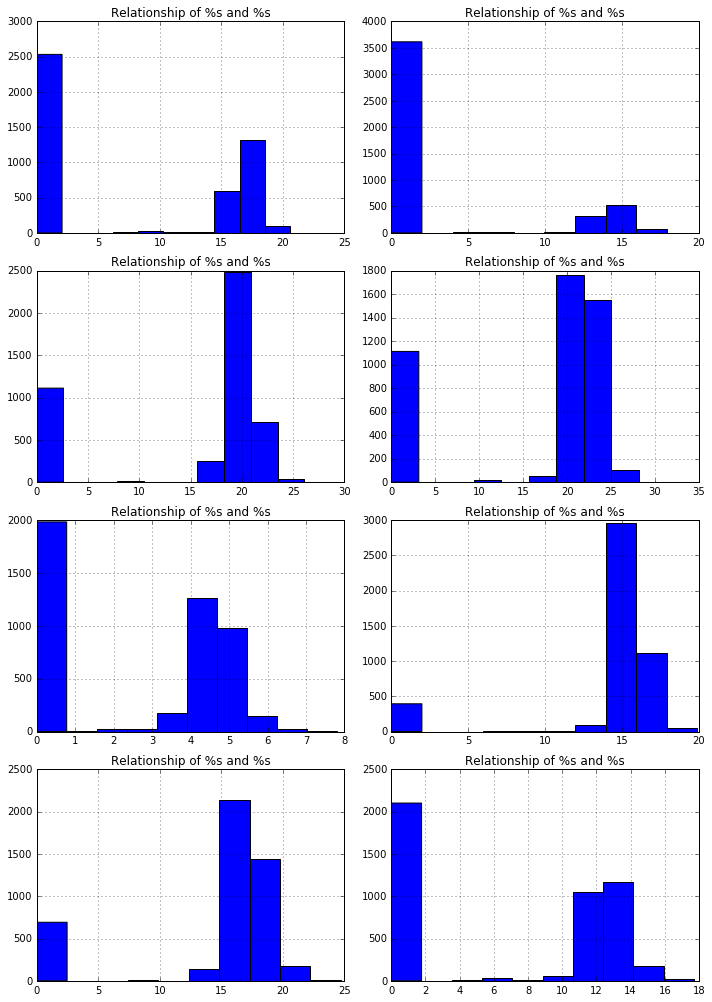

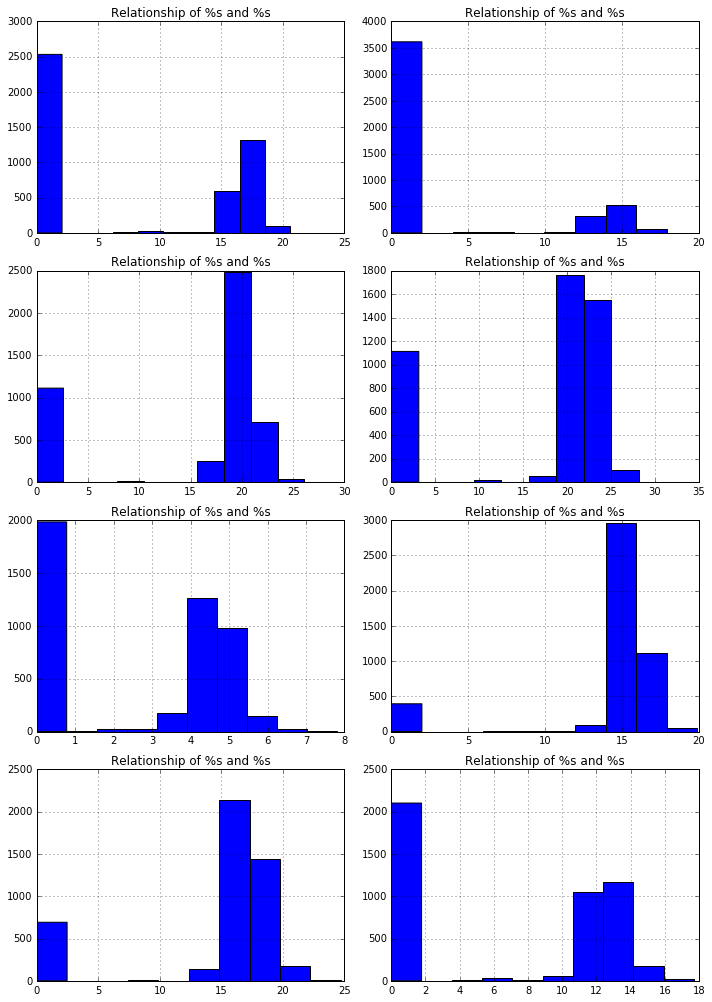

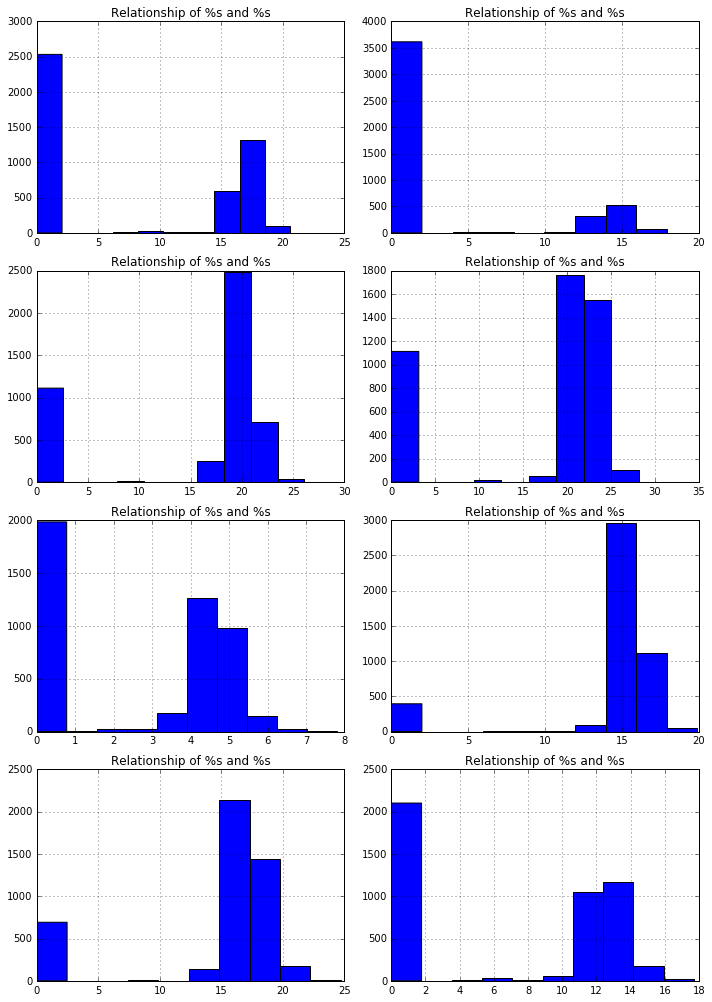

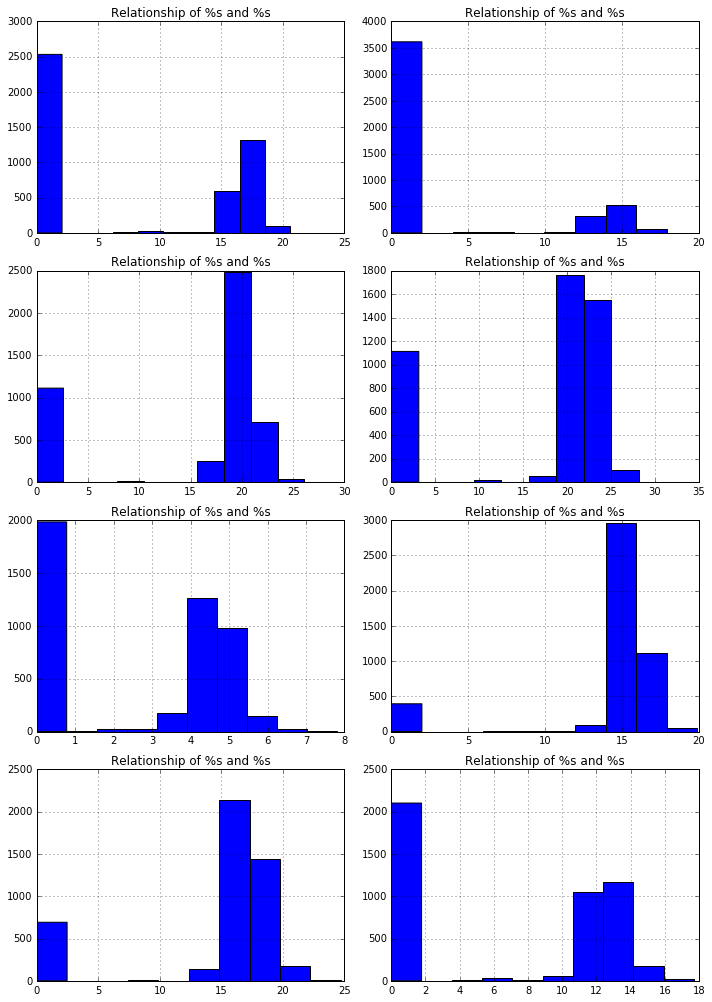

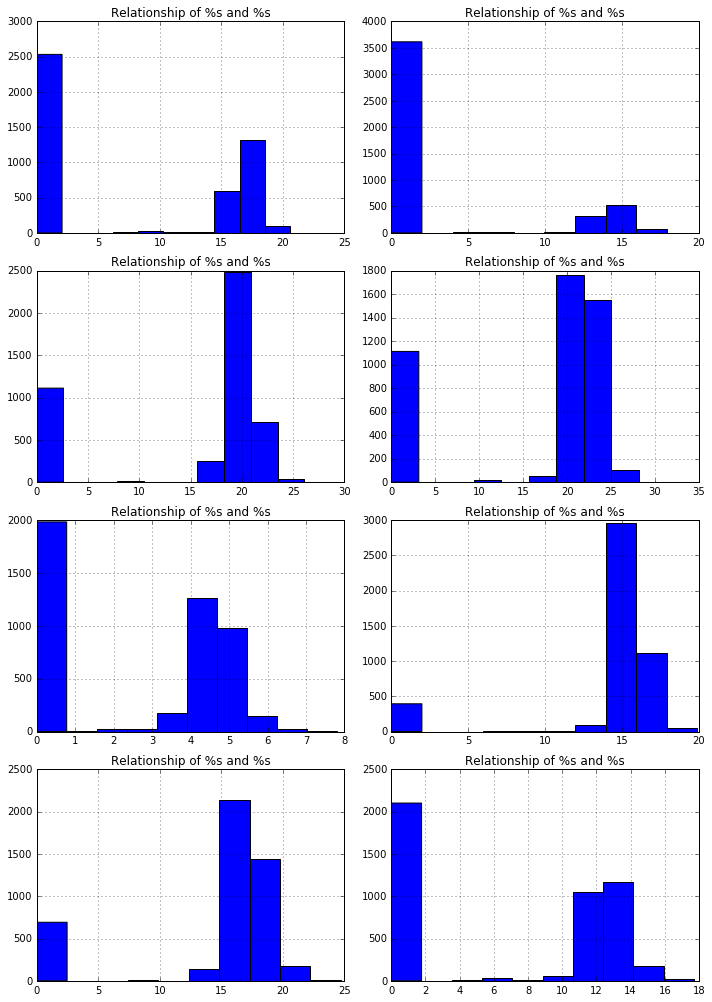

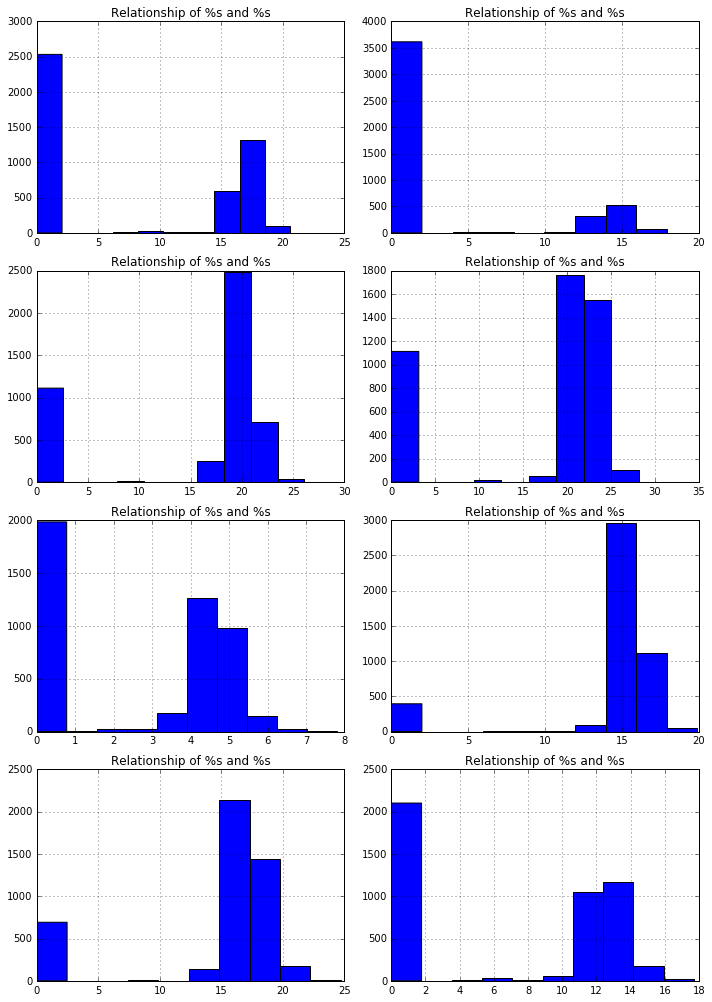

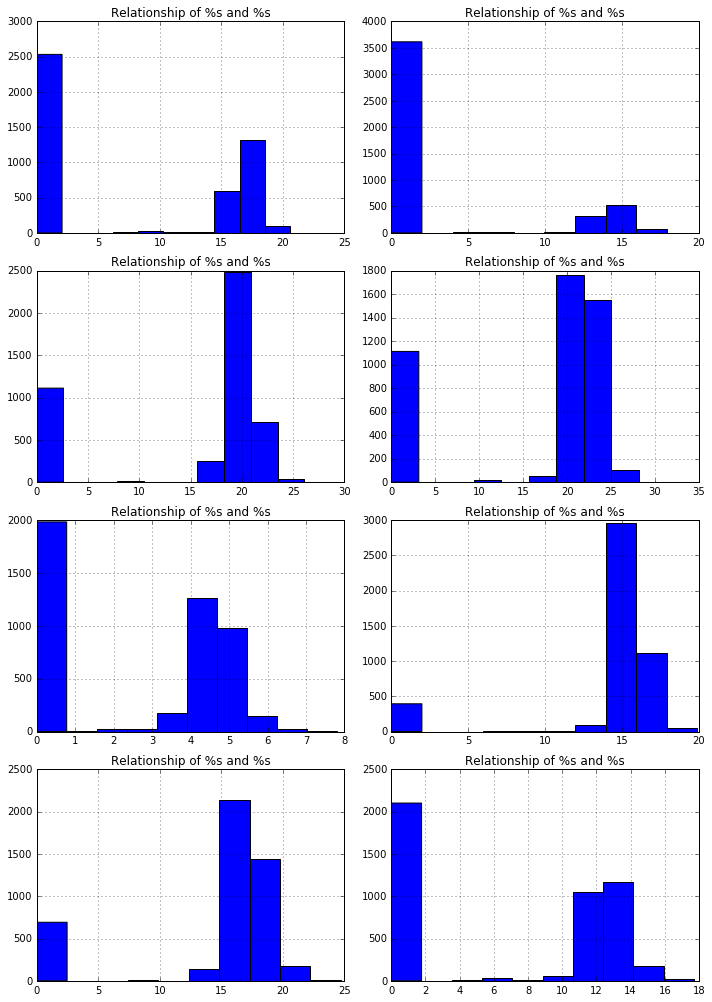

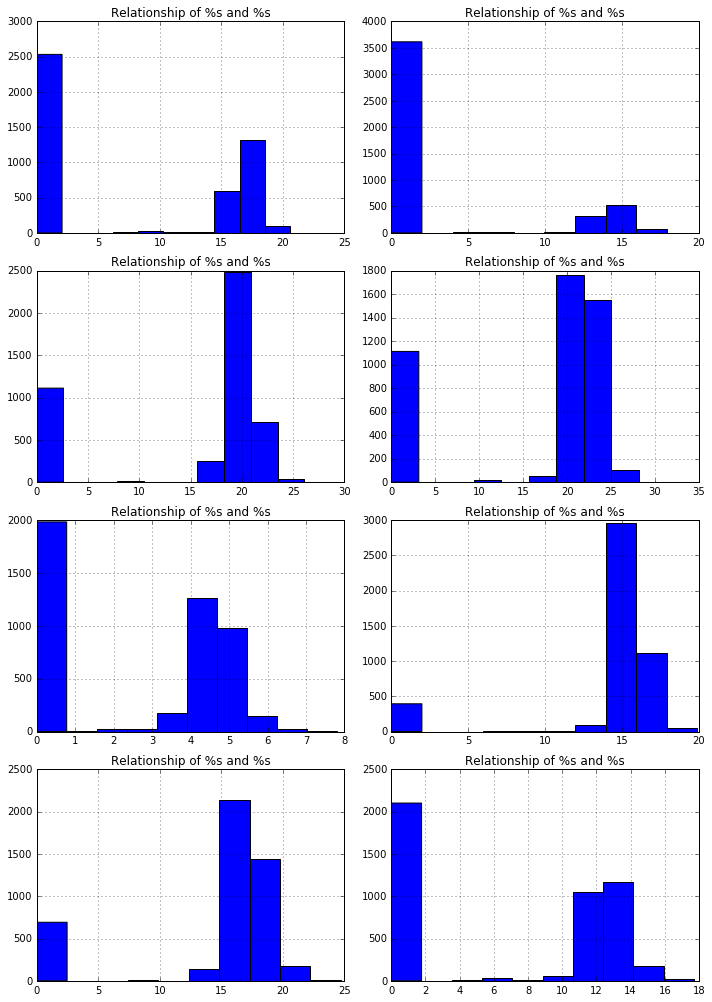

In [257]:
for x in tar_col:
    plot_features('Relationship of %s and %s')